In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
from sklearn.compose import ColumnTransformer

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
import joblib

In [14]:
import warnings

In [15]:
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("C:\\Users\\Jancy\\Downloads\\College Data.csv")

In [17]:
df.loc[df['Female'] < 0, 'Female'] = df['Total Students'] - df['Male']

In [18]:
df.drop(columns=['College ID'], inplace=True)

In [19]:
df['CGPA'] = df['CGPA'].clip(4.0, 10.0)

In [20]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='CGPA', ylabel='Count'>

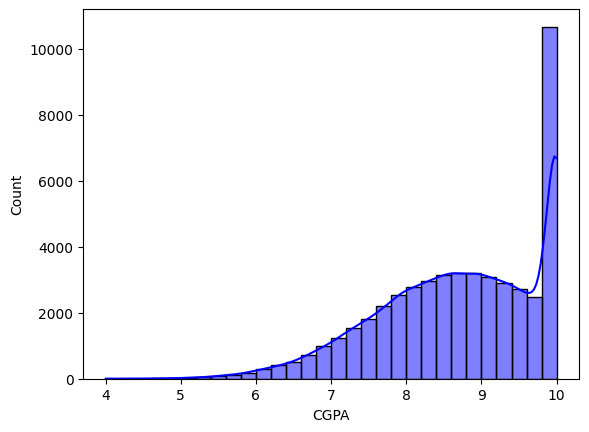

In [21]:
sns.histplot(df['CGPA'], bins=30, kde=True, color='blue')

Text(0.5, 1.0, 'Distribution of CGPA')

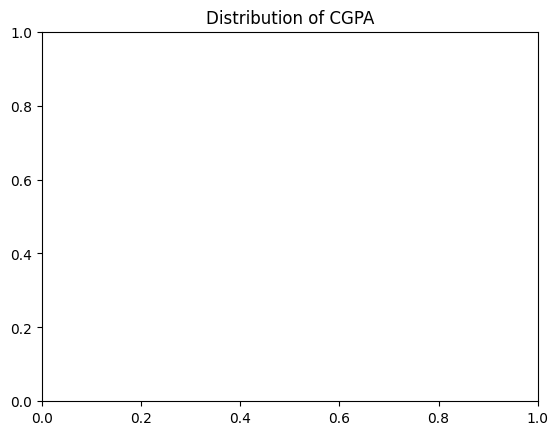

In [22]:
plt.title("Distribution of CGPA")

Text(0.5, 0, 'CGPA')

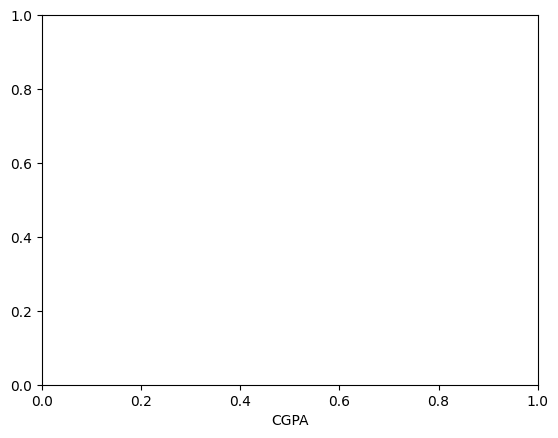

In [23]:
plt.xlabel("CGPA")

Text(0, 0.5, 'Frequency')

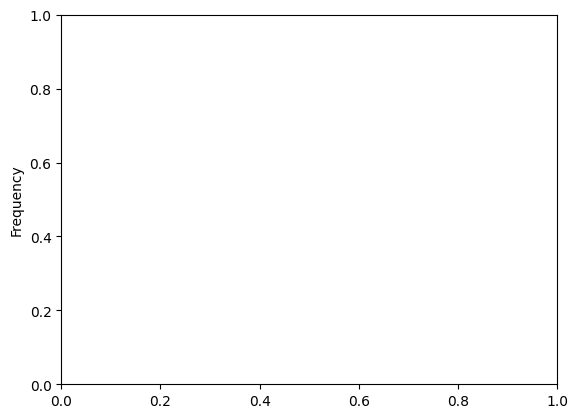

In [24]:
plt.ylabel("Frequency")

In [25]:
plt.show()

In [26]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: >

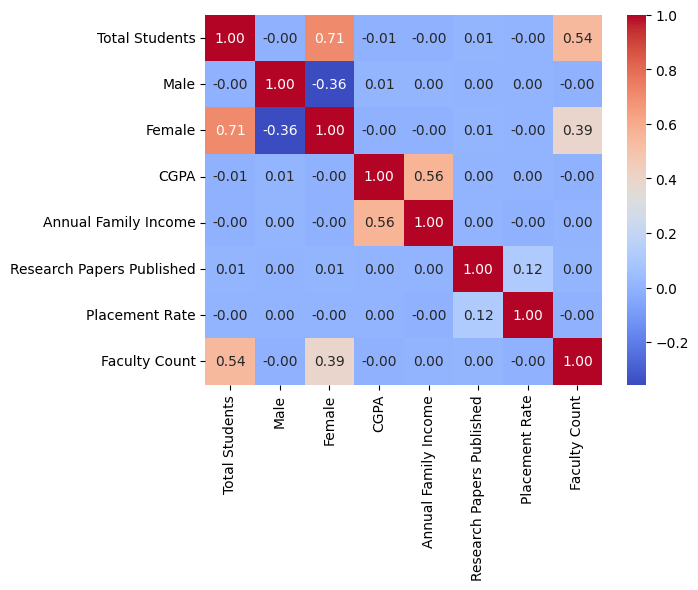

In [28]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

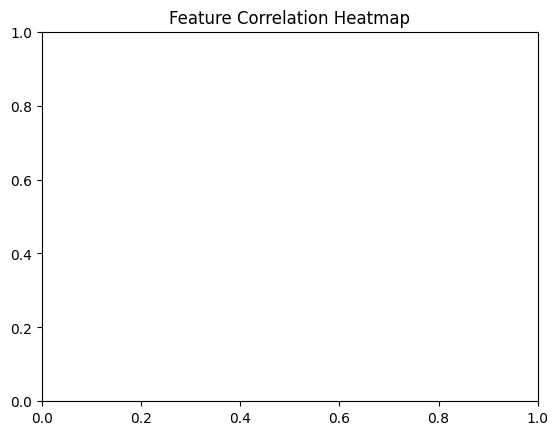

In [29]:
plt.title("Feature Correlation Heatmap")

In [30]:
plt.show()

In [31]:
categorical_features = ['Country', 'Branch', 'Sports']

In [32]:
numerical_features = ['Total Students', 'Male', 'Female', 'Placement Rate', 'Annual Family Income', 'Research Papers Published', 'Faculty Count']

In [33]:
ohe = OneHotEncoder(drop='first')

In [34]:
scaler = StandardScaler()

In [35]:
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_features),
    ('cat', ohe, categorical_features)
])

In [36]:
X = df.drop(columns=['CGPA'])
y = df['CGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_score = float('-inf')

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")
    
    if r2 > best_score:
        best_score = r2
        best_model = pipeline

Linear Regression: RMSE = 0.87, R² = 0.32


In [ ]:
joblib.dump(best_model, "student_performance_model.pkl")

print("Best model saved as student_performance_model.pkl")